# Train classifier to estimate analysis efficiency vs gen variable

- Actual training code in train.py
- Classifier based on sklearn. Default is GradientBoostedClassifier, 
    but can be specified at run time.

## Load libraries

In [1]:
import train as tn
#reload(tn)

import plotting
reload(plotting)

import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

import numpy as np

from pprint import pprint

import os
import json
import importlib

import util as ut
reload(ut)

Welcome to ROOTaaS 6.06/08


<module 'util' from 'util.pyc'>

## Instantiate helper class

Data are read from ROOT trees and converted into pandas data frames.  
The loading function makes sure that all the needed columns have been read from the trees, otherwise it rebilds the data frame.


#### In the following cell the parameters are set up. In this case a new classifier will be initiated with the name effGenVarClass and stored in the directory "classifiers". The training data will be read from a root tree located in dataDir. The branches of gen and reco events are the default ones (look at the help function for detailed information).

In [1]:
ut.defaultParameters(dataDir="./data", 
                     classifiers=['class','recoPt','recoNjets2p5'],
                          load = True,
                     inputName = "effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out",
                       outName = "effGenVarClassBinnedRecoPtCV_BinnedRecoNjets2p5_out",
                        outDir = './classifiers',
                      InputDir = './classifiers',
                    defineBins = { 'recoPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
                                  'recoNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False),
                                  #'genPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
                                  #'genNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
                                 }
                    )

NameError: name 'ut' is not defined

In case you need help or further explanation you can execute the help function:

#### We want to use machine learning techniques for classification. For that we need to specify the classifier we want to use like here the GradientBoostingClassifier from sklearn.ensamble. Furthermore the parameters of the used classifier have to be set, e.g. the number of training events, max. tree depth, learning rate and so forth.

In [3]:
ut.params["class"] = [ "sklearn.ensemble.GradientBoostingClassifier", 
                      dict(trainevts=100000,
                           max_depth=5,learning_rate=0.2,n_estimators=200,
                        min_weight_fraction_leaf=1e-3)
]

ut.params['recoPt'] = ["xgboost.sklearn.XGBClassifier",
                       { "Xbr" : ["genPt","absGenRapidity"],
                        "trainevts" :100000, 
                        "max_depth" : 5,"learning_rate" : 0.1,
                        "n_estimators" : 500,"min_child_weight" : 1e-5,
                        "nthread" : 16}]
"""
,
                        "cvoptimize" : True,"cv_params_grid" : { "max_depth" : [5, 7, 10],
                                                                 "learning_rate" : [0.05, 0.1, 0.2], 
                                                                 "n_estimators" : [250,500,700,1000],
                                                                 "min_child_weight" : [1e-4, 5e-4, 1e-3],
                                                                 "subsample" : [0.1, 0.2, 0.5, 1.]}, 
                        "cv_nfolds" : 5, "cv_niter" : 5,      
"""
ut.params['recoNjets2p5'] =  ["xgboost.sklearn.XGBClassifier",
                        { "Xbr" : ["genJet2p5Pt0", "genJet2p5Rapidity0",
                                    "genJet2p5Pt1", "genJet2p5Rapidity1",
                                    "genJet2p5Pt2", "genJet2p5Rapidity2",
                                    "genJet2p5Pt3", "genJet2p5Rapidity3",
                                    "genPt","absGenRapidity"
                                ],
            "trainevts" :100000, "max_depth" : 7,
            "learning_rate" : 0.1,"n_estimators" : 500,
            "min_child_weight" : 1e-5,
            "nthread" : 16 }]
                        

In [4]:
#ut.params

$\color{red}{\text{changes in class become also active without ut.setParams(). }}$

In [4]:
#set the parameters "class" defined above
"""
? discuss the function setParams() with Pasquale
"""
#ut.setParams()

entered config files named my_train_config
None


In [4]:
%time effFitter = ut.loadOrMake()

Load object with the name effGenVarClassBinnedRecoPt_out and the following paramters 
{'InputDir': './classifiers',
 'class': ['sklearn.ensemble.GradientBoostingClassifier',
           {'learning_rate': 0.2,
            'max_depth': 5,
            'min_weight_fraction_leaf': 0.001,
            'n_estimators': 200,
            'trainevts': 100000}],
 'classifiers': ['class', 'recoPt', 'recoNjets2p5'],
 'clean': [],
 'dataDir': './data',
 'dataFname': 'output_InsideAcceptance_125.root',
 'defineBins': {'recoNjets2p5': {'boundaries': [-0.5,
                                                0.5,
                                                1.5,
                                                2.5,
                                                3.5,
                                                100.0],
                                 'overflow': False},
                'recoPt': {'boundaries': [0.0,
                                          15.0,
                                        

## Train classifiers

# $\color{red}{\text{What happens in the bellow 2 cells?}}$

In [5]:
print(ut.params.get("setupJoblib",False))
if ut.params.get("setupJoblib",True):
    print('hi')
    ut.setupJoblib(ipp_profile=ut.params.get('ippProfile','short'))

False
hi


###  make sure that the trained classifers have been evaluated

In [6]:
ut.runEvaluation(effFitter)

Index([u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Rapidity0',
       u'genJet2p5Rapidity1', u'genJet2p5Rapidity2', u'genJet2p5Rapidity3',
       u'genNjets2p5', u'genPt', u'genRapidity', u'recoNjets2p5', u'recoPt',
       u'recoRapidity', u'weight', u'proc', u'absGenRapidity', u'recoPtBin',
       u'recoPtCat', u'recoNjets2p5Bin', u'recoNjets2p5Cat', u'class_prob_0',
       u'class_prob_1', u'class_prob_2', u'class_prob_3', u'recoPtCat_prob_0',
       u'recoPtCat_prob_1', u'recoPtCat_prob_2', u'recoPtCat_prob_3',
       u'recoPtCat_prob_4', u'recoPtCat_prob_5', u'recoPtCat_prob_6',
       u'recoPtCat_prob_7', u'recoPtCat_prob_8', u'recoPtCat_prob_9',
       u'recoPtCat_prob_10', u'recoPtCat_prob_11', u'recoPtCat_prob_12',
       u'recoPtCat_prob_13', u'recoPtCat_prob_14', u'recoPtCat_prob_15',
       u'recoPtCat_prob_16', u'recoPtCat_prob_17', u'recoPtCat_prob_18',
       u'recoPtCat_prob_19', u'recoPtCat_prob_20', u're

### Run the actual training

In [9]:
#reload(tn)

In [7]:
#reload(tn)
%time ut.runTraining(effFitter)

We need to train the following classifiers recoNjets2p5
Fitting recoNjets2p5
<class 'xgboost.sklearn.XGBClassifier'>
{'nthread': 16, 'learning_rate': 0.1, 'trainevts': 100000, 'min_child_weight': 1e-05, 'Xbr': ['genJet2p5Pt0', 'genJet2p5Rapidity0', 'genJet2p5Pt1', 'genJet2p5Rapidity1', 'genJet2p5Pt2', 'genJet2p5Rapidity2', 'genJet2p5Pt3', 'genJet2p5Rapidity3', 'genPt', 'absGenRapidity'], 'n_estimators': 500, 'max_depth': 7}
['genJet2p5Pt0', 'genJet2p5Rapidity0', 'genJet2p5Pt1', 'genJet2p5Rapidity1', 'genJet2p5Pt2', 'genJet2p5Rapidity2', 'genJet2p5Pt3', 'genJet2p5Rapidity3', 'genPt', 'absGenRapidity', 'class_prob_0', 'class_prob_1', 'class_prob_2', 'class_prob_3']
recoNjets2p5Cat
cvoptimize False
((100000, 14), 1400000)
((100000,), 100000)
((100000,), 100000)
[[  4.70493698e+01   1.35553241e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    9.37878723e+01   8.03131044e-01   3.86127047e-01   1.17574288e-01
    2.57626153e-01   

## Save the output

In [8]:
#reload(tn)
%time tn.IO.save(effFitter)

./classifiers/effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out.pkl.gz
CPU times: user 32.2 s, sys: 6.29 s, total: 38.5 s
Wall time: 42 s


# Additional cells

In [12]:
df = effFitter.df

In [13]:
df.size

72249008

do some plotting of the event features

In [14]:
df_reduced = df[['genPt','absGenRapidity','class','recoPt']][0:10000]

In [15]:
class_0 = df_reduced[df_reduced['class'] == -1]
class_1 = df_reduced[df_reduced['class'] ==  0]
class_2 = df_reduced[df_reduced['class'] ==  1]
class_3 = df_reduced[df_reduced['class'] ==  2]


In [16]:
#fig = plt.figure(figsize=(12,12))
#plt.plot(class_0['absGenRapidity'],class_0['genPt'],'r.',label='class -1')
#plt.plot(class_1['absGenRapidity'],class_1['genPt'],'g.',label='class  0')
#plt.plot(class_2['absGenRapidity'],class_2['genPt'],'b.',label='class  1')
#plt.plot(class_3['absGenRapidity'],class_3['genPt'],'k.',label='class  2')
#plt.legend(loc='best')
#plt.xlabel(r'$|y|$')
#plt.ylabel(r'$p_T$')
#lt.show()

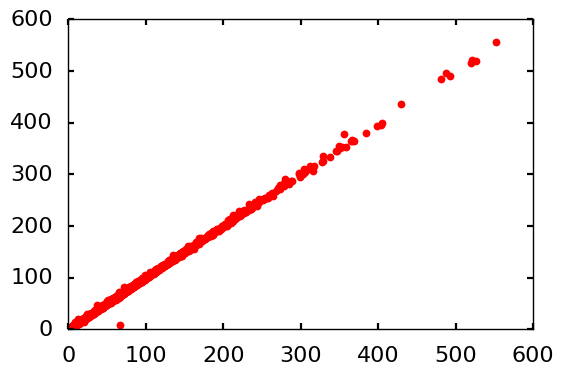

In [17]:
plt.plot(class_2['recoPt'],class_2['genPt'],'r.')

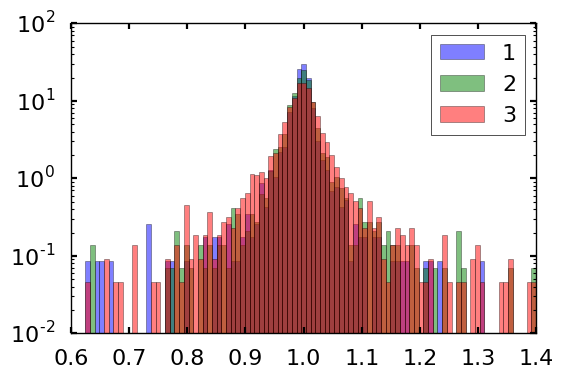

rms of class 1 0.0578053677271
rms of class 2 0.193100438034
rms of class 3 2.06181606912


In [18]:
c1 = np.divide(class_1['recoPt'],class_1['genPt'])
c2 = np.divide(class_2['recoPt'],class_2['genPt'])
c3 = np.divide(class_3['recoPt'],class_3['genPt'])


plt.hist(c1,bins=np.linspace(0.6,1.4,100),log=True,alpha=0.5,normed=True,label='1')
plt.hist(c2,bins=np.linspace(0.6,1.4,100),log=True,alpha=0.5,normed=True,label='2')
plt.hist(c3,bins=np.linspace(0.6,1.4,100),log=True,alpha=0.5,normed=True,label='3')
plt.xlim(0.6,1.4)

plt.legend(loc='best')
plt.show()

print("rms of class 1 " +str(np.std(c1,ddof=1)))
print("rms of class 2 " +str(np.std(c2,ddof=1)))
print("rms of class 3 " +str(np.std(c3,ddof=1)))

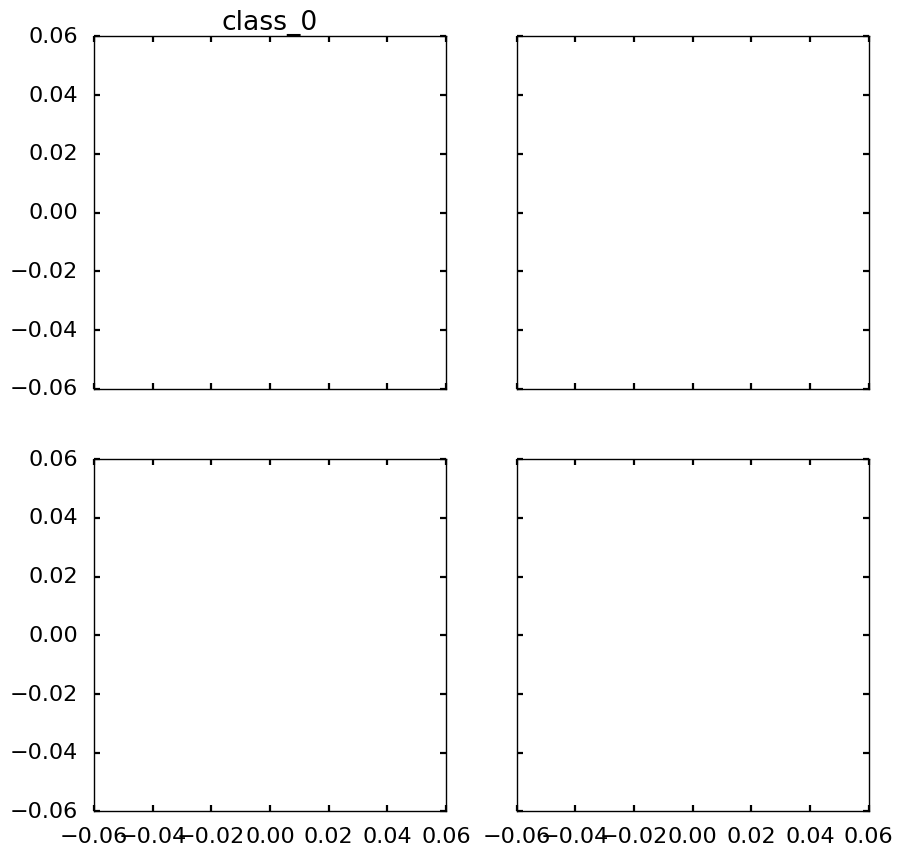

In [19]:
f, axarr = plt.subplots(2, 2,figsize=(10,10), sharex='all', sharey='all')
#plt.ylim(0,800)
#plt.xlim(0,2.5)
#plt.xlabel(r'$|y|$')
#plt.ylabel(r'$p_T$')
#f.figure(figuresize=(10,10))
axarr[0, 0].plot(class_0['recoPt'],class_0['genPt'],'r.')
axarr[0, 0].set_title('class_0')

#axarr[0, 1].plot(class_1['absGenRapidity'],class_1['genPt'],'g.')
#axarr[0, 1].set_title('class_1')
#axarr[1, 0].plot(class_2['absGenRapidity'],class_2['genPt'],'b.')
#axarr[1, 0].set_title('class_2')
#axarr[1, 1].plot(class_3['absGenRapidity'],class_3['genPt'],'k.')
#axarr[1, 1].set_title('class_3')

plt.show()

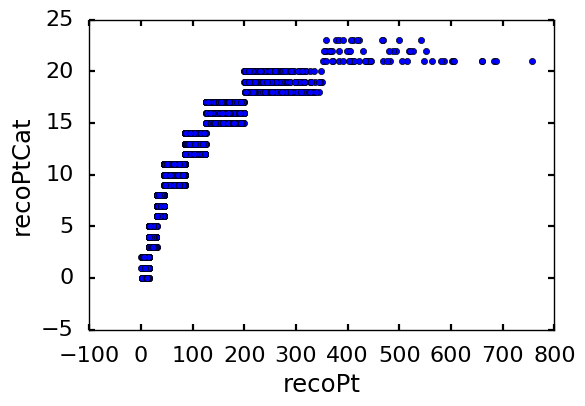

In [20]:
effFitter.df[['recoPtCat','recoPt']][:10000].plot(kind='scatter',x='recoPt',y='recoPtCat')

In [21]:
df[['class','genPt','absGenRapidity','class_prob_0','class_prob_1','class_prob_2','class_prob_3','genPtCat']][0:5]

KeyError: "['genPtCat'] not in index"

In [ ]:
df[['recoPtBin','recoPtCat','genPtBin','genPtCat','recoNjets2p5Bin','recoNjets2p5Cat','genNjets2p5Bin','genNjets2p5Cat']][0:5]

In [ ]:
df[['genPt','genPtBin','class','genPtCat']][0:10]

In [ ]:
df.loc[df['genPtCat'] == -1]

In [ ]:
df[['recoPtCat','recoPt']][:10000].plot(kind='scatter',x='recoPt',y='recoPtCat')

In [ ]:
df[['recoPt']][:10000].plot(kind='hist')

In [ ]:
type(effFitter)

### Reload the above effieciency fitter and list some features

In [ ]:
%time tn.IO.load(effFitter.name,effFitter.outdir)

"pretty" print the input features of the classifier

In [ ]:
pprint(effFitter.clfs)

"pretty" print the columns of the classifier after being exported to a pandas dataframe

In [ ]:
pprint(effFitter.df.columns)

In [ ]:
df = effFitter.df

Display the first 3 rows of the dataframe

In [ ]:
df[0:3]

# Additional code

In [ ]:
# set default parameters
# ut.defaultParameters(clean=['class'],classifiers=['class'],setupJoblib=True)
# ut.params["class"]=["xgboost.sklearn.XGBClassifier",
#                     { "trainevts" :-1, "max_depth" : 5,
#                         "learning_rate" : 0.2,"n_estimators" : 250,
#                         "min_child_weight" : 5e-4,
#                         "nthread" : 16,
#                         "cvoptimize" : True,
#                         "cv_params_grid" : { 
#                             "max_depth" : [3, 5, 7, 10],
#                             "learning_rate" : [0.05, 0.1, 0.2], "n_estimators" : [100,250,500],
#                              "min_child_weight" : [1e-4, 5e-4, 1e-3],
#                             "subsample" : [0.1, 0.2, 0.5, 1.]
#                         },
#                     "cv_nfolds" : 5, "cv_niter" : 100, "cv_verbose" : 20
#                     }
#                     ]



# ut.params["recoPt"]= ["xgboost.sklearn.XGBClassifier",
#           { "Xbr" : ["genPt","absGenRapidity"],
#             "trainevts" :-1, "max_depth" : 5,
#             "learning_rate" : 0.1,"n_estimators" : 500,
#             "min_child_weight" : 1e-5,
#             "nthread" : 16,
#             "cvoptimize" : True,
#             "cv_params_grid" : { 
#                     "max_depth" : [5, 7, 10],
#                     "learning_rate" : [0.05, 0.1, 0.2], "n_estimators" : [250,500,700,1000],
#                     "min_child_weight" : [1e-4, 5e-4, 1e-3],
#                     "subsample" : [0.1, 0.2, 0.5, 1.]
#                  },
#             "cv_nfolds" : 4, "cv_niter" : 50, "cv_verbose" : 20      
#           }
#         ]
# ut.params["outName"] = "addRecoPt"

# load additional parameters 
# a list of json files to be loaded can be specified through the the environmental variable my_train_config 